In [1]:
# 라이브러리 import
import pandas as pd
import numpy as np
import importlib
import dataprocessing
import yfinance as yf
import matplotlib.pyplot as plt

from loader import (df_company, df_kospi_group, df_kosdaq_group, df_kospi_company, df_kosdaq_company, price, fsdata)


importlib.reload(dataprocessing)      # 모듈을 강제로 재실행
df_summary = dataprocessing.df_summary

In [55]:
pd.options.display.max_rows = 100

In [85]:
df_summary.to_excel('df_summary3.xlsx', index=True)

In [ ]:
# 제조업 = df_summary['KAP세분류'] == '제조업'

# df_summary.loc[제조업,'10차표준(세분류)'].nunique()
# 세분류리스트 = df_summary.loc[제조업,'10차표준(세분류)'].unique().tolist()

In [2]:
print(f"현재 KAP세분류 열의 고유값 수는 {df_summary['KAP세분류'].nunique()}개 입니다.")
pd.set_option('display.max_rows', None)
df_summary['KAP세분류'].value_counts()

현재 KAP세분류 열의 고유값 수는 26개 입니다.


KAP세분류
제조업         498
기계및장비제조업    364
부품제조업       215
소프트웨어서비스    183
의약품제조업      169
서비스업        151
도매업         113
화학제조업       108
스팩           81
지주회사         64
건설업          59
반도체제조업       59
연구개발업        55
금융업          55
광고업          46
1차제조업        43
식품제조업        42
소매업          35
방송업          34
운송업          25
농축수임산물업      24
통신업          22
인공지능         22
출판업          20
자동차업         17
부동산업         10
Name: count, dtype: int64

In [5]:
vc = df_summary['KAP세분류'].value_counts()
df_counts = vc.reset_index()
df_counts.columns = ['KAP세분류', 'count']
df_counts.to_excel('df_counts.xlsx', index=False)

In [115]:
price_copy = price.copy()
price_copy['rolling180D'] = price_copy['삼성전자'].rolling(window='180D').mean()

In [86]:
price_copy['rolling5']

날짜
2024-04-01        NaN
2024-04-02        NaN
2024-04-03        NaN
2024-04-04        NaN
2024-04-05    84180.0
               ...   
2025-03-25    60140.0
2025-03-26    60720.0
2025-03-27    61040.0
2025-03-28    60740.0
2025-03-31    60200.0
Name: rolling5, Length: 241, dtype: float64

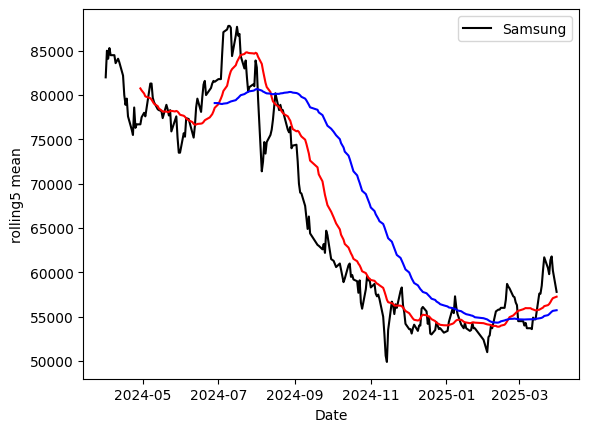

In [104]:
plt.plot(price_copy['삼성전자'], color ='black', label='삼성전자')
# plt.plot(price_copy['rolling5'], color ='red', label='삼성전자 rolling5 mean')
plt.plot(price_copy['rolling20'], color ='red', label='삼성전자 rolling5 mean')
plt.plot(price_copy['rolling60'], color ='blue', label='삼성전자 rolling5 mean')
# plt.plot(price_copy['rolling180'], color ='red', label='삼성전자 rolling5 mean')
plt.xlabel('Date')
plt.ylabel('rolling5 mean')
plt.legend(['Samsung'])
plt.show()

In [108]:
start = price_copy['rolling60'].first_valid_index()
df_plot = price_copy.loc[start:]
df_plot

,삼성전자,SK하이닉스,LG에너지솔루션,삼성바이오로직스,현대차,셀트리온,기아,NAVER,한화에어로스페이스,KB금융,...,투비소프트,엔에이치스팩25호,스타코링크,아이엠,더테크놀로지,CNH,rolling5,rolling20,rolling60,rolling180
날짜,,,,,,,,,,,,,,,,,,,,,
2024-06-28,81500,236500,326500,727000,295000,166472,129300,166900,258103,78500,...,2250,2280,17167,6820,2512,2435,81160.0,78565.0,79098.333333,NaN
2024-07-01,81800,235500,347000,759000,286000,175832,128600,162900,251897,79600,...,2390,2300,17167,6670,2578,2080,81400.0,78980.0,79095.000000,NaN
2024-07-02,81800,232000,343500,810000,272500,176214,123600,159900,243103,83200,...,2400,2315,16844,6080,2542,2115,81600.0,79285.0,79041.666667,NaN
2024-07-03,81800,236000,358000,810000,276000,173636,123700,159800,241034,84400,...,2380,2325,17025,6120,2470,2105,81700.0,79610.0,79003.333333,NaN
2024-07-04,84600,230000,359000,803000,277500,174686,125600,159800,250345,85900,...,2330,2320,16896,6030,2422,2085,82300.0,79970.0,78991.666667,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-25,59800,208000,335500,1074000,220000,186000,100800,207500,654000,81900,...,596,2125,3550,929,364,109,60140.0,56430.0,55286.666667,63411.111111
2025-03-26,61400,214000,360000,1072000,222000,185400,101400,204000,667000,81800,...,596,2125,3360,867,351,109,60720.0,56640.0,55426.666667,63300.555556
2025-03-27,61800,207000,356500,1059000,212500,181200,97900,197800,663000,80200,...,596,2125,2835,903,391,109,61040.0,56900.0,55565.000000,63190.555556


In [117]:
price_copy['rolling180D'].first_valid_index()

Timestamp('2024-04-01 00:00:00')

In [139]:
def mean_last_6m(ts, current_date):
    start = current_date - pd.DateOffset(months=6)
    return ts.loc[start:current_date].mean()

def mean_last_1m(ts, current_date):
    start = current_date - pd.DateOffset(months=1)
    return ts.loc[start:current_date].mean()


def mean_last_3m(ts, current_date):
    start = current_date - pd.DateOffset(months=3)
    return ts.loc[start:current_date].mean()





In [140]:
series = price_copy['삼성전자']
price_copy['rolling6m'] = [mean_last_6m(series, d) for d in series.index]
price_copy['rolling1m'] = [mean_last_1m(series, d) for d in series.index]
price_copy['rolling3m'] = [mean_last_3m(series, d) for d in series.index]

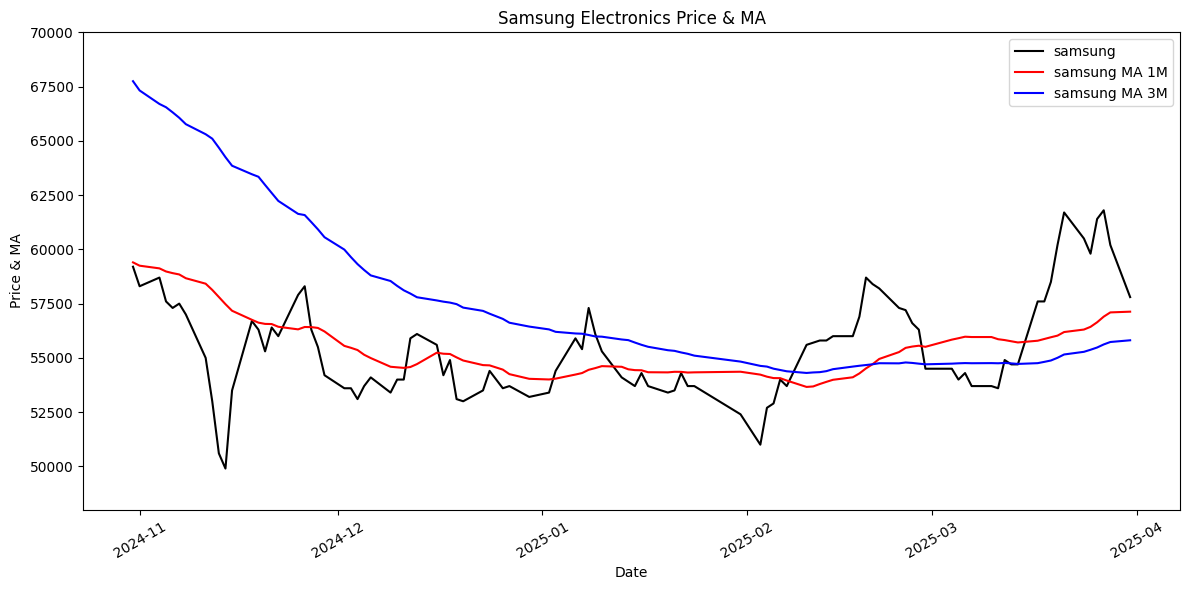

In [149]:
df_range = price_copy.loc['2024-10-31':'2025-03-31',['rolling6m','삼성전자','rolling1m','rolling3m']]
plt.figure(figsize=(12,6))
plt.plot(df_range.index, df_range['삼성전자'], label='samsung', color='black')
# plt.plot(df_range.index, df_range['rolling6m'], label='samsung MA')
plt.plot(df_range.index, df_range['rolling1m'], label='samsung MA 1M', color='red')
plt.plot(df_range.index, df_range['rolling3m'], label='samsung MA 3M', color='blue')


plt.xlabel('Date')
plt.ylabel('Price & MA')
plt.title('Samsung Electronics Price & MA')
plt.legend()
plt.xticks(rotation=30)
plt.tight_layout()
plt.ylim(48000, 70000)

plt.show()


In [132]:
df_range

,rolling6m,삼성전자
날짜,,
2024-10-31,74202.459016,59200
2024-11-01,74045.081967,58300
2024-11-04,73856.198347,58700
2024-11-05,73722.950820,57600
2024-11-06,73589.430894,57300
2024-11-07,73459.677419,57500
2024-11-08,73263.709677,57000
2024-11-11,72946.721311,55000
2024-11-12,72784.552846,53000


In [168]:
nflx = yf.download('NFLX', start='2023-01-01', end='2023-12-31', interval='1d', threads=False)

Failed to get ticker 'NFLX' reason: Expecting value: line 1 column 1 (char 0)
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['NFLX']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [161]:
btc = yf.Ticker('BTC-USD')
btc_history = btc.history(start='2024-01-01', end='2024-12-31', interval='1d')
btc_history

Failed to get ticker 'BTC-USD' reason: Expecting value: line 1 column 1 (char 0)
$BTC-USD: possibly delisted; No timezone found


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
